In [11]:
import os
os.chdir('/het/p4/ramirez/gcewavelets/skysearch/code/')

In [12]:
import numpy as np
import sys, os
import _maps as maps

In [13]:
import healpy as hp
import astropy_healpix

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [15]:
# load local directory
username="ramirez"
local_dir = "/het/p4/"+username+"/gcewavelets/skysearch/"
maps_dir = "/het/p4/"+username+"/gcewavelets/skysearch/data/maps/"

# ---
 # Block: Specify map ids
model = 'ilias_60x60' # only available option: SA0
trial_id = str(0)
model_dir = maps_dir + (model + '_' + trial_id + '/')
energy_bin = '16'
map_type = 'bkgd'

# load events from map 
if energy_bin == 'all' or energy_bin == str(-1):
    if map_type == 'bkgd':
        map_dir = model_dir + 'bkgd/'
    elif map_type == 'all':
        inj_id = str(0)
        map_dir = model_dir + ('bkgd_wps_' + inj_id + '/') 
else:
    ie = int(float(energy_bin))
    if map_type == 'bkgd':
        bkgd_dir = model_dir + 'bkgd/'
        map_dir = bkgd_dir + 'energy_bin_' + str(ie) + '/'
    elif map_type == 'all':
        inj_id = str(0)
        bkgd_wps_dir = model_dir + ('bkgd_wps_' + inj_id + '/')
        map_dir = bkgd_wps_dir + 'energy_bin_' + str(ie) + '/'  

data_dir = map_dir + 'projected_maps/'
# ---

# load father pixel and data
npix = np.random.randint(192)
npix = 112
patch_dir = data_dir + 'map_' + str(npix) + '/'

In [16]:
a_deg = 0.3
str_a_deg = str.format('{0:.5f}',a_deg)

wavelet_name = 'mexh'
grid_scale_deg = 0.1
str_grid_scale_deg = str.format('{0:.4f}',grid_scale_deg)
file_name = wavelet_name + '_' + 'coefficient_map' + '_' + str_a_deg + '_' + str_grid_scale_deg + '.npy'
cwt_map = np.load(patch_dir + file_name, allow_pickle = True)
projected_map = dict(np.load(patch_dir + 'projected_map_dict.npz'))

# decided to separate grid and projected maps into two different dictionaries
# grid is defined using the total background map for all energies
grid_dict = dict(np.load(patch_dir + 'grid_dict_' + str_grid_scale_deg + '_' + '.npz'))
mesh_bxby = grid_dict['rectangular_grid']
grid = grid_dict['grid']

In [17]:
data = projected_map['outmost_region_points']
mesh_bxby = grid_dict['rectangular_grid']
grid = grid_dict['grid']

In [18]:
r_out_edge = projected_map['outer_region_edge']
x_out_edge = r_out_edge[:,0] ; y_out_edge = r_out_edge[:,1]
bx_min, bx_max, by_min, by_max = [np.min(x_out_edge), np.max(x_out_edge),
                                  np.min(y_out_edge), np.max(y_out_edge)]

In [19]:
scale = 0.1 * np.pi / 180
step_size = scale 
mesh_bxby, arr_b, arr_bx_plot, arr_by_plot = maps.build_mesh_(bx_min, bx_max, by_min, by_max, step_size, step_size, return_arrays_for_plotting=True)

(-0.22575039922668377,
 0.2262898770398482,
 -0.20317234408792986,
 0.2034893716267495)

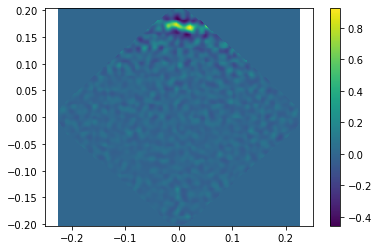

In [20]:
fig = plt.figure(1,figsize=(6,4))
ax = fig.add_subplot(111)

plot = plt.pcolormesh(arr_bx_plot, arr_by_plot, cwt_map[:,:,0], cmap='cividis', shading='flat'
                     , norm=mpl.colors.Normalize(vmin=np.min(cwt_map[:,:,0]), 
                                                 vmax=np.max(cwt_map[:,:,0])))
plt.pcolormesh(arr_bx_plot, arr_by_plot, cwt_map[:,:,0])
plt.colorbar()
ax.axis('equal')